# IMPORTING LIBRARIES AND DATASET

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error, root_mean_squared_error  , r2_score
from sklearn.model_selection import GridSearchCV

In [174]:
df = pd.read_csv('car-mpg.csv')

# DATA INSPECTION AND DATA CLEANING

In [175]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [176]:
df.info() ,df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


(None, (398, 9))

In [177]:
df['hp'] = pd.to_numeric(df['hp'] , errors='coerce')

In [178]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [179]:
df['hp'] = df['hp'].fillna(value=df['hp'].median())

In [180]:
df.drop(columns=['car_name'] , inplace=True)

In [181]:
df['origin'].unique()

array([1, 3, 2])

# DATA PREPROCESSING

In [182]:
df = pd.get_dummies(df , columns=['origin'] , drop_first=True)


In [183]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,True,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,False,False


# EDA

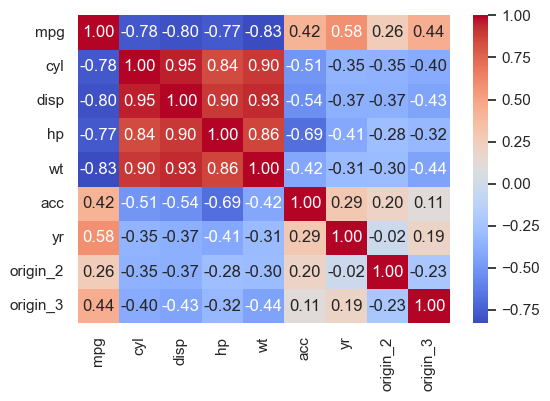

In [184]:
corr_matrix = df.corr(numeric_only=True)

sns.set_theme(style='darkgrid')
plt.figure(figsize=(6,4))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f'
            )

plt.show()

In [185]:
# cyl and disp can be drop in future to increase the accuract 

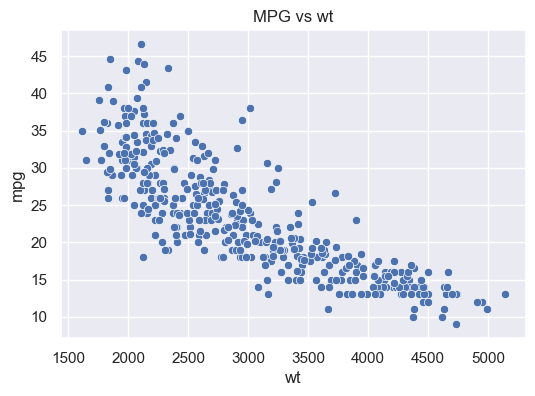

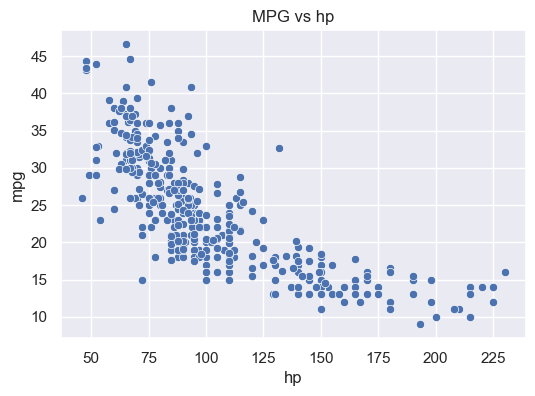

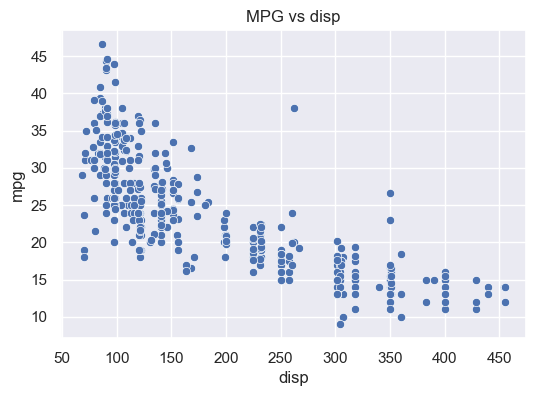

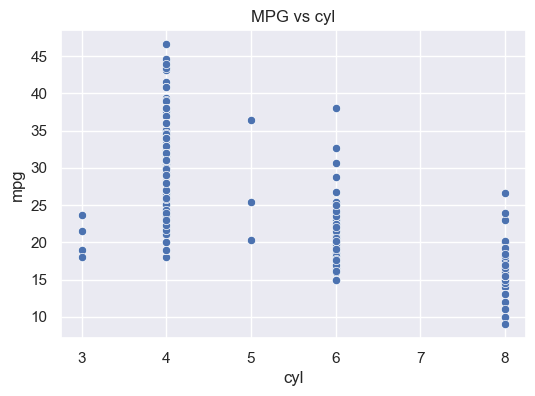

In [186]:
cols = ['wt' , 'hp' , 'disp' , 'cyl']

for col in cols:
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x = col, 
        y ='mpg',
        data = df    
    )
    plt.title(f'MPG vs {col}')
    plt.show()

# DATA SPLITTING AND TRASFORMATION

In [187]:
x = df.drop(columns=['mpg'])
y = df['mpg']
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size=0.2 ,random_state=30 )

In [188]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

# MODEL TRANING

In [189]:
knn = KNeighborsRegressor(n_jobs=-1 , n_neighbors=5 , weights='distance' , metric='euclidean')

knn.fit(x_train , y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [190]:
y_pred = knn.predict(x_test)

In [191]:
print('mse : ', mean_squared_error(y_test , y_pred) )
print('mae : ', mean_absolute_error(y_test , y_pred) )
print('rmse : ', root_mean_squared_error(y_test , y_pred) )
print('r2_score : ', r2_score(y_test , y_pred) )

mse :  8.072086067473254
mae :  2.2360835883655326
rmse :  2.841141683808334
r2_score :  0.8640962139136247


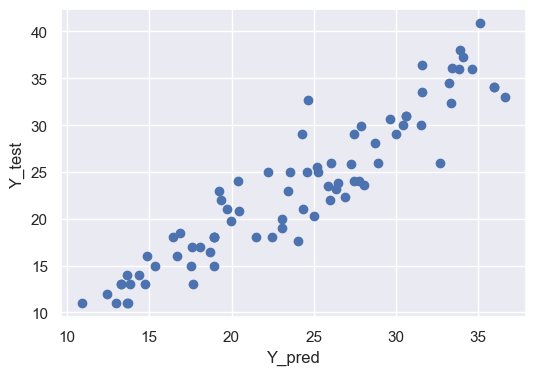

In [192]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred,y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()


# OPTIMIZATION

In [193]:

param_grids = {
    'n_neighbors' : list(range(1,25)) , 
    'weights' : ['uniform' , 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

model_knn = GridSearchCV(
    knn,
    param_grid=param_grids,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

model_knn.fit(x_train , y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(metric='euclidean', n_jobs=-1,
                                           weights='distance'),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [194]:
best_knn = model_knn.best_estimator_
best_knn.fit(x_train ,y_train)

KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=4,
                    weights='distance')

In [195]:
y_pred = best_knn.predict(x_test)

In [196]:
print('mse : ', mean_squared_error(y_test , y_pred) )
print('mae : ', mean_absolute_error(y_test , y_pred) )
print('rmse : ', root_mean_squared_error(y_test , y_pred) )
print('r2_score : ', r2_score(y_test , y_pred) )

mse :  8.548692344540765
mae :  2.2621697579541844
rmse :  2.923814690526875
r2_score :  0.8560719439808485
